In [ ]:
# importing basic libraries
import pandas as pd
import numpy as np

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Save model
import joblib
import os


In [ ]:
folders = [
    "data/raw",
    "data/processed",
    "models",
    "visuals"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Project folders created successfully ✅")


Project folders created successfully ✅


In [25]:
from google.colab import files

uploaded = files.upload()


Saving car_details.csv to car_details.csv


In [26]:
car_df = pd.read_csv("/content/car_details.csv")
customer_df = pd.read_csv("/content/Customer_Details.csv", encoding='latin1')

print("Car Data Shape:", car_df.shape)
print("Customer Data Shape:", customer_df.shape)

car_df.head()

Car Data Shape: (303, 10)
Customer Data Shape: (501, 9)


,Car_Name,Year,Sellin_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,ID
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,1
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,2
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,3
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,4
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,5


In [28]:
# Handle missing values
car_df.fillna(car_df.median(numeric_only=True), inplace=True)
customer_df.fillna(customer_df.median(numeric_only=True), inplace=True)

# Remove duplicates
car_df.drop_duplicates(inplace=True)
customer_df.drop_duplicates(inplace=True)

# Merge datasets
df = pd.merge(car_df, customer_df, on="ID")

# Save processed dataset
df.to_csv("data/processed/final_dataset.csv", index=False)

print("Final Dataset Shape:", df.shape)
df.head()


Final Dataset Shape: (303, 18)


,Car_Name,Year,Sellin_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,ID,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,1,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0.0,41.851720,62812.09301,11609.380910,238961.2505
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,2,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0.0,40.870623,66646.89292,9572.957136,530973.9078
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,3,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1.0,43.152897,53798.55112,11160.355060,638467.1773
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,4,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1.0,58.271369,79370.03798,14426.164850,548599.0524
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,5,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1.0,57.313749,59729.15130,5358.712177,560304.0671


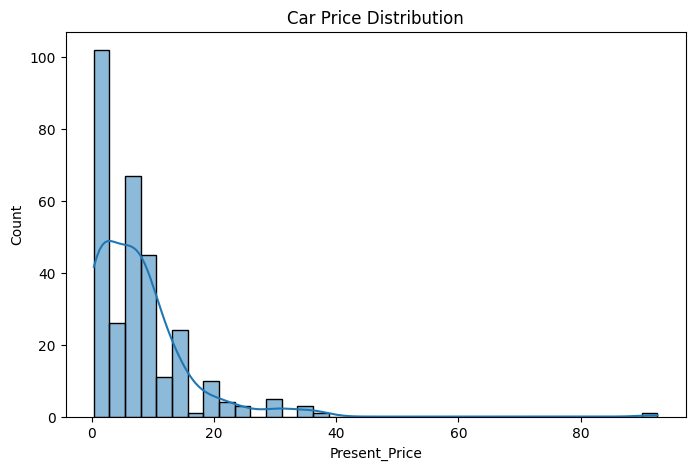

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df["Present_Price"], kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Present_Price")
plt.ylabel("Count")
plt.savefig("visuals/price_distribution.png")
plt.show()


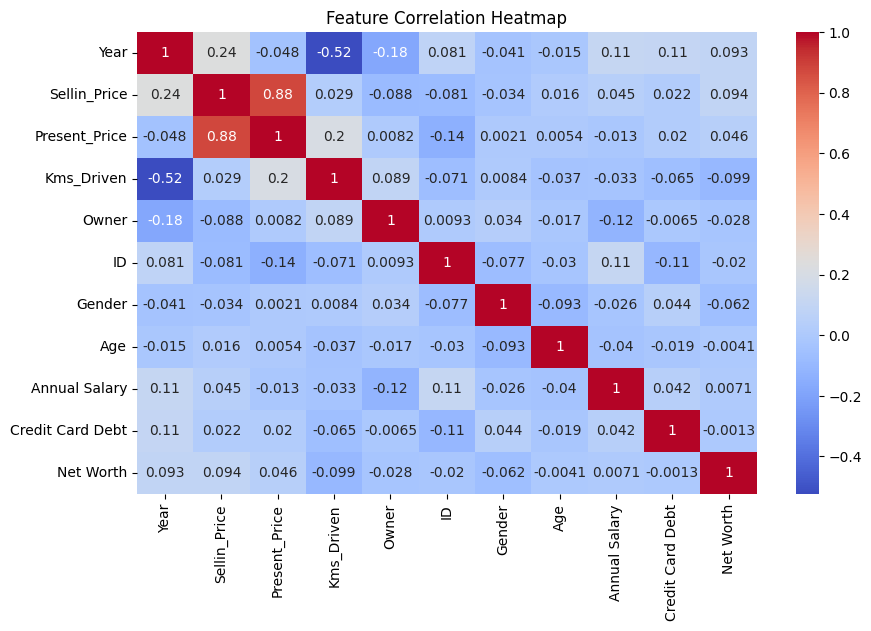

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("visuals/correlation_heatmap.png")
plt.show()

In [32]:
label_cols = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.to_csv("data/processed/final_dataset.csv", index=False)
print("Feature encoding completed ✅")


Feature encoding completed ✅


In [33]:
X = df.drop("Sellin_Price", axis=1)
y = df["Sellin_Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 242
Testing samples: 61


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, mae])

    print(f"{name}")
    print("R2 Score:", round(r2, 3))
    print("MAE:", round(mae, 2))
    print("-" * 30)


Linear Regression
R2 Score: 0.828
MAE: 1.25
------------------------------
Decision Tree
R2 Score: 0.913
MAE: 0.82
------------------------------
Random Forest
R2 Score: 0.944
MAE: 0.64
------------------------------


In [35]:
best_model = models["Random Forest"]
joblib.dump(best_model, "models/random_forest_model.pkl")

print("Random Forest model saved successfully ✅")


Random Forest model saved successfully ✅


In [36]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "R2 Score", "Mean Absolute Error"]
)

results_df


,Model,R2 Score,Mean Absolute Error
0,Linear Regression,0.828146,1.245992
1,Decision Tree,0.912722,0.820164
2,Random Forest,0.943700,0.638723


In [37]:
files.download("data/processed/final_dataset.csv")
files.download("models/random_forest_model.pkl")
files.download("visuals/price_distribution.png")
files.download("visuals/correlation_heatmap.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>